In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Updated_Cleaned_Dataset.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [3]:
X = df.drop("FWI",axis=1)
Y = df["FWI"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [4]:
#Feauture engineering, setting threshold value
#Multicollinerlity
def correlation(df,thr):
    col = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thr:
                coln = corr_matrix.columns[i]
                col.add(coln)
    return col

In [5]:
cd = correlation(X_train,0.85)
X_train.drop(cd,axis=1,inplace=True)
X_test.drop(cd,axis=1,inplace=True)

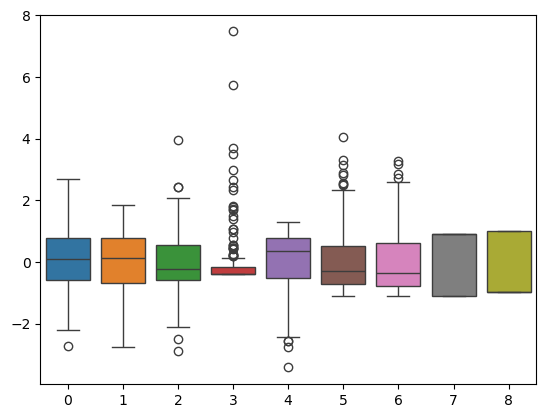

In [6]:
#Standadization/feature scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

sns.boxplot(X_train)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,Y_train)
print(l.intercept_)
print(l.coef_)

7.156043956043957
[-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298  0.40422124 -0.39259928]


In [8]:
Y_pred = l.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_pred,Y_test)
mae = mean_absolute_error(Y_test,Y_pred)
print(mse)
print(r2)
print(mae)

0.6742766873791579
0.9839977157632893
0.5468236465249976


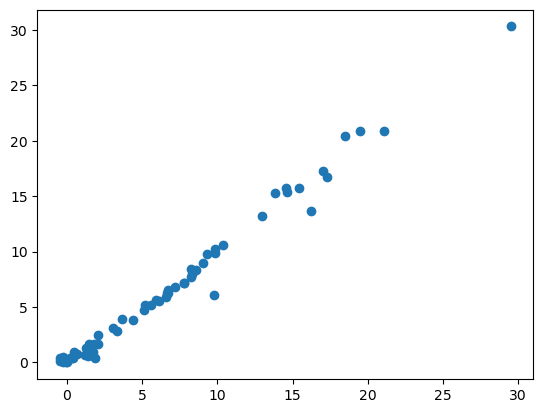

In [9]:
plt.scatter(Y_pred,Y_test)
plt.show()

Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(Y_test,Y_pred_lr)
r2_lr = r2_score(Y_pred_lr,Y_test)
mae_lr = mean_absolute_error(Y_test,Y_pred_lr)
print(mse_lr)
print(r2_lr)
print(mae_lr)


2.248345891897475
0.9264742326805692
1.1331759949144085


Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
le = Ridge()
le.fit(X_train,Y_train)
Y_pred_le = le.predict(X_test)
mse_le = mean_squared_error(Y_test,Y_pred_le)
r2_le = r2_score(Y_pred_le,Y_test)
mae_le = mean_absolute_error(Y_test,Y_pred_le)
print(mse_le)
print(r2_le)
print(mae_le)

0.6949198918152101
0.9834070933284211
0.5642305340105713


Elastic NET

In [12]:
from sklearn.linear_model import ElasticNet
lq = ElasticNet()
lq.fit(X_train,Y_train)
Y_pred_lq = lq.predict(X_test)
mse_lq = mean_squared_error(Y_test,Y_pred_lq)
r2_lq = r2_score(Y_pred_lq,Y_test)
mae_lq = mean_absolute_error(Y_test,Y_pred_lq)
print(mse_lq)
print(r2_lq)
print(mae_lq)

5.517251101025224
0.7814447243400926
1.8822353634896


Cross Validation Using Lasso (For hyper tuning)

In [13]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=5)
lcv.fit(X_train,Y_train)
Y_pred_lcv = lcv.predict(X_test)
lcv.alpha_
lcv.alphas_
#similarly we have RidgeCV,ElasticNetCV


array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [14]:
#Pickling
#pickle preprocessing also, helps during deployemnt
import pickle
pickle.dump(s,open('scaler.pkl','wb'))
pickle.dump(le,open('ridge.pkl','wb'))